ID
Reason for absence
Month of absence
Day of the week
Seasons
Service time
Age
Work load Average/day 
Hit target
Disciplinary failure
Education
Son
Social drinker
Social smoker
Pet
Weight
Height
Body mass index
Absenteeism time in hours
Transportation expense             66.952223
Distance from Residence to Work    14.836788
dtype: float64 
 Transportation expense             221.329730
Distance from Residence to Work     29.631081
dtype: float64


,Transportation expense,Distance from Residence to Work
182,0.398348,-0.312135
427,2.205607,-0.851335
486,1.040597,0.092265
270,-0.632238,1.440266
629,2.086118,1.507666


(10, 2)


2 centroids : {0: array([2, 6], dtype=int64), 1: array([3, 4], dtype=int64), 2: array([3, 8], dtype=int64)}
{0: [array([2, 6], dtype=int64)], 1: [array([3, 4], dtype=int64), array([6, 2], dtype=int64), array([7, 4], dtype=int64), array([7, 3], dtype=int64), array([7, 4], dtype=int64), array([8, 5], dtype=int64), array([7, 6], dtype=int64)], 2: [array([3, 8], dtype=int64), array([4, 7], dtype=int64)]}

2 centroids : {0: array([2., 6.]), 1: array([6.42857143, 4.        ]), 2: array([3.5, 7.5])}
{0: [array([2, 6], dtype=int64), array([3, 4], dtype=int64)], 1: [array([6, 2], dtype=int64), array([7, 4], dtype=int64), array([7, 3], dtype=int64), array([7, 4], dtype=int64), array([8, 5], dtype=int64), array([7, 6], dtype=int64)], 2: [array([3, 8], dtype=int64), array([4, 7], dtype=int64)]}

2 centroids : {0: array([2.5, 5. ]), 1: array([7., 4.]), 2: array([3.5, 7.5])}
{0: [array([2, 6], dtype=int64), array([3, 4], dtype=int64)], 1: [array([6, 2], dtype=int64), array([7, 4], dtype=int64), arra

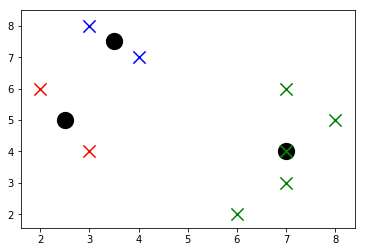

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tqdm import tqdm_notebook as tqdm


data = pd.read_excel("Absenteeism_at_work.xls")

for col in data.columns.values:
    if col !="Reason for absence" and col != "Height":
        print(col)
        data = data.drop(col,axis = 1)
std = data.std()
mean = data.mean()
print(std ,"\n", mean)

data = (data - mean)/std
data = shuffle(data)

# data = pd.read_csv("k_means.csv")
# data.head()


class K_Means:
    def __init__(self, k=3, tol=0.000000000001, max_iter=5):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
        for i in tqdm(range(self.max_iter)):
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            prev_centroids = dict(self.centroids)
            print(i,"centroids :",self.centroids)
            print(self.classifications)
            print()
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
#                 print(np.sum(self.classifications[classification],axis=0))
#             optimized = True
#             for c in self.centroids:
#                 original_centroid = prev_centroids[c]
#                 current_centroid = self.centroids[c]
#                 if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
#                     print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
#                     optimized = False
#             if optimized:
#                 break
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

X = np.array(data)
print(X.shape)
clf = K_Means()
clf.fit(X)
print(clf.centroids)

colors = ['r','g','b','c','k','o','y']    
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
plt.show()